In [1]:
import matplotlib.pyplot as plt
import pickle 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [2]:

with open('split_data.pkl','rb') as f:
    data = pickle.load(f)

x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [3]:
kmeans = KMeans(n_clusters=12, random_state=42, n_init=10)
k_train_labels = kmeans.fit_predict(x_train)
k_test_labels = kmeans.predict(x_test)

In [4]:
dbscan = DBSCAN(eps=1.1, min_samples=5)
db_train_labels = dbscan.fit_predict(x_train)
db_test_labels = dbscan.fit_predict(x_test)

In [5]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

In [6]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate="auto", init='pca', random_state=42)
tsne_train = tsne.fit_transform(x_train)

In [7]:
print("Silhouette Score:", silhouette_score(x_train, k_train_labels))
print("Calinski-Harabasz:", calinski_harabasz_score(x_train, k_train_labels))
print("Davies-Bouldin:", davies_bouldin_score(x_train, k_train_labels))

Silhouette Score: 0.5411587612610993
Calinski-Harabasz: 506399.2310116594
Davies-Bouldin: 0.49469714014687827


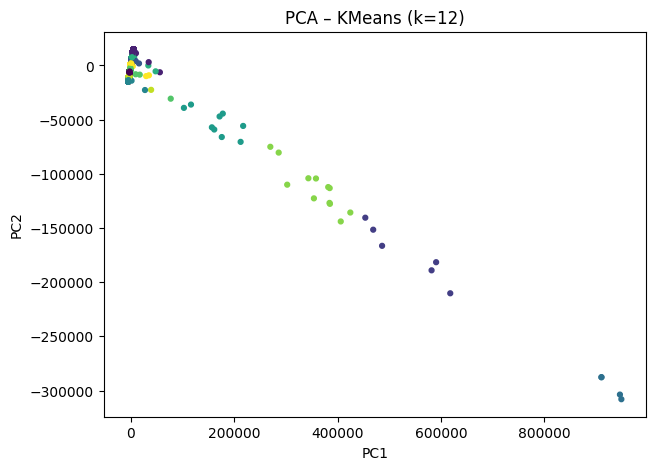

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(pca_train[:,0], pca_train[:,1], c=k_train_labels, s=12)
plt.title("PCA – KMeans (k=12)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

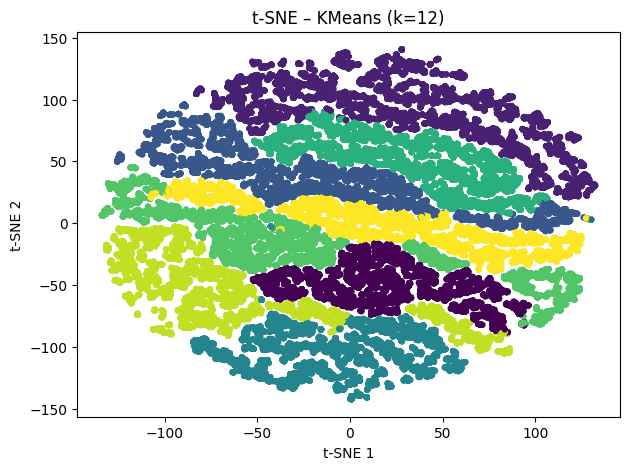

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(tsne_train[:,0], tsne_train[:,1], c=k_train_labels, s=12)
plt.title("t-SNE – KMeans (k=12)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [10]:
import pickle
import numpy as np




with open("kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)

np.save("tsne_train.npy", tsne_train)
